In [107]:
# Import các thư viện sử dụng 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_excel('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer_Churn_TXL2.xlsx')
df.head()

<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23664\2253591424.py:8: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_excel('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer_Churn_TXL2.xlsx')


,Churn,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,0,1,0,0,0,0,2
1,0,34,0,2,0,1,3
2,1,2,0,2,0,0,3
3,0,45,0,2,2,1,0
4,1,2,1,0,0,0,2


In [108]:
# Chia dữ liệu thành features (X) và target (y)
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [110]:
from sklearn.ensemble import RandomForestClassifier
# Chia dữ liệu 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

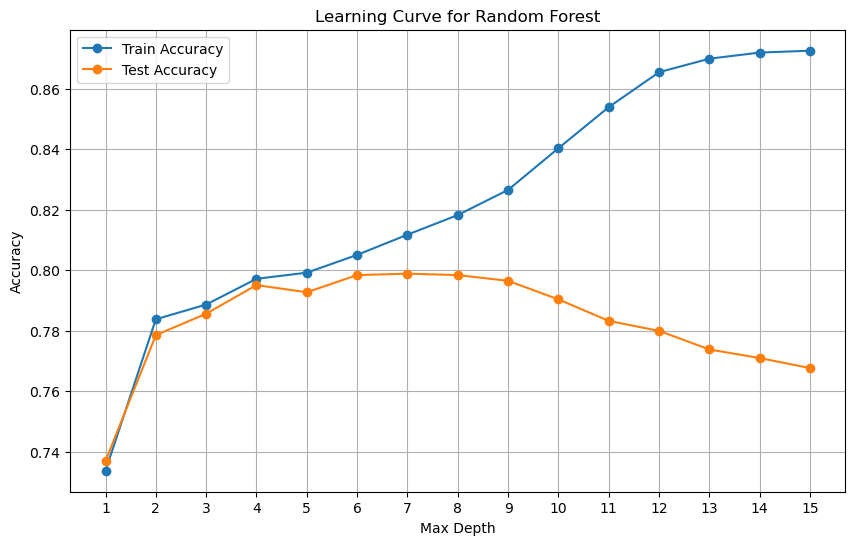

In [173]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# List các giá trị max_depth cần thử nghiệm
depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
train_scores = []
test_scores = []

# Lặp qua từng giá trị max_depth
for depth in depths:
    # Khởi tạo mô hình với max_depth
    rf = RandomForestClassifier(max_depth=depth)
    
    # Huấn luyện mô hình
    rf.fit(X_train, y_train)
    
    # Độ chính xác trên tập huấn luyện
    train_pred = rf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    
    # Độ chính xác trên tập kiểm tra
    test_pred = rf.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

# Vẽ đồ thị Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, marker='o', label='Train Accuracy')
plt.plot(depths, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Random Forest')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

In [176]:
# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(criterion="entropy",max_depth = 7,n_estimators=99)
# Huấn luyện mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)
# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = rf_model.predict(X_test)

In [182]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy *100:.2f}' ' %')

# In ra báo cáo phân loại và ma trận nhầm lẫn
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 79.98 %

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1557
           1       0.65      0.52      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113


Confusion Matrix:
[[1403  154]
 [ 269  287]]


In [178]:
X1 = {
    'tenure': 5,
    'InternetService': 1,
    'OnlineSecurity': 0,
    'TechSupport': 0,
    'Contract': 0,
    'PaymentMethod':3
}

X1_df = pd.DataFrame(X1, index=[0])

Y1 = rf_model.predict(X1_df)
if Y1 == 0:
    print("Dự báo khách hàng X1 bằng mô hình Random Forest: No")
else: 
    print("Dự báo khách hàng X1 bằng mô hình Random Forest: Yes")

Dự báo khách hàng X1 bằng mô hình Random Forest: Yes


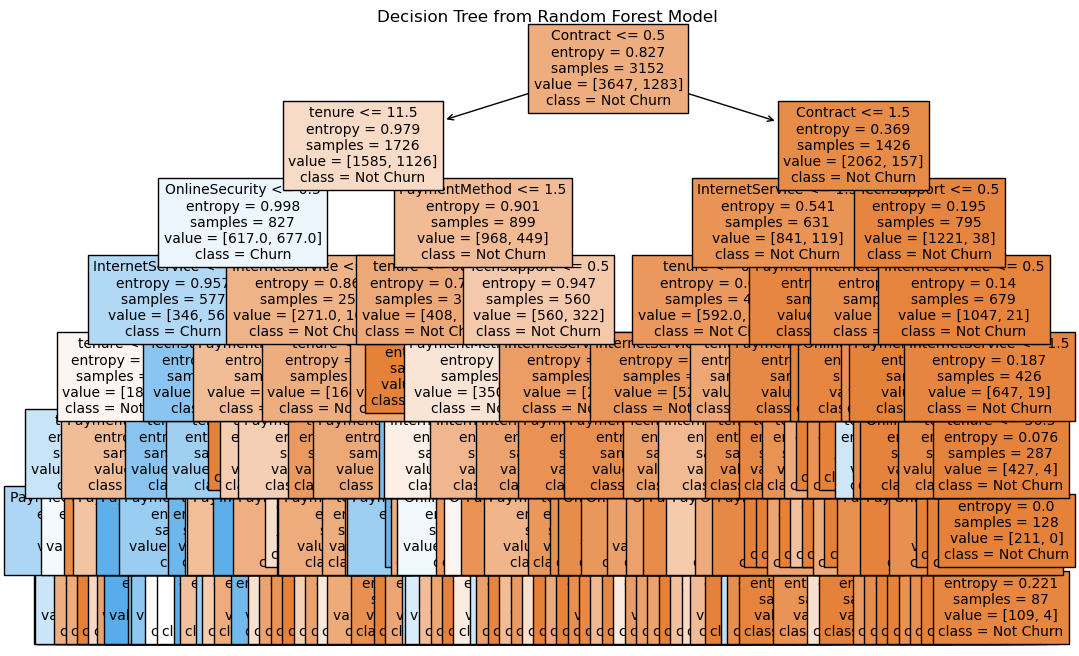

In [179]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Vẽ biểu đồ cây quyết định
plt.figure(figsize=(12, 8))

# Chọn cây quyết định từ mô hình Random Forest (ví dụ cây đầu tiên)
tree = rf_model.estimators_[0]

# Chuyển đổi Index thành danh sách (list) feature_names
feature_names_list = X.columns.tolist()

# Vẽ cây quyết định
plot_tree(tree, filled=True, feature_names=feature_names_list, class_names=['Not Churn', 'Churn'], fontsize=10)

# Hiển thị tiêu đề cho biểu đồ
plt.title("Decision Tree from Random Forest Model")
plt.show()

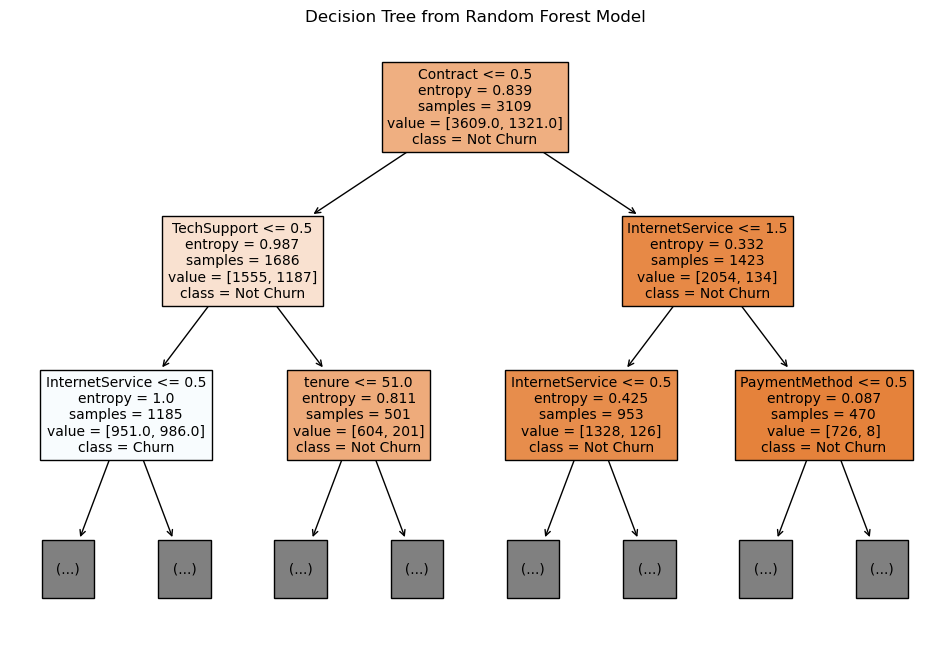

In [180]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Vẽ biểu đồ cây quyết định
plt.figure(figsize=(12, 8))

# Chọn cây quyết định từ mô hình Random Forest (ví dụ cây đầu tiên)
tree = rf_model.estimators_[2]

# Chuyển đổi Index thành danh sách (list) feature_names
feature_names_list = X.columns.tolist()

# Vẽ cây quyết định
plot_tree(tree, filled=True, feature_names=feature_names_list, class_names=['Not Churn', 'Churn'],max_depth=2, fontsize=10)

# Hiển thị tiêu đề cho biểu đồ
plt.title("Decision Tree from Random Forest Model")
plt.show()

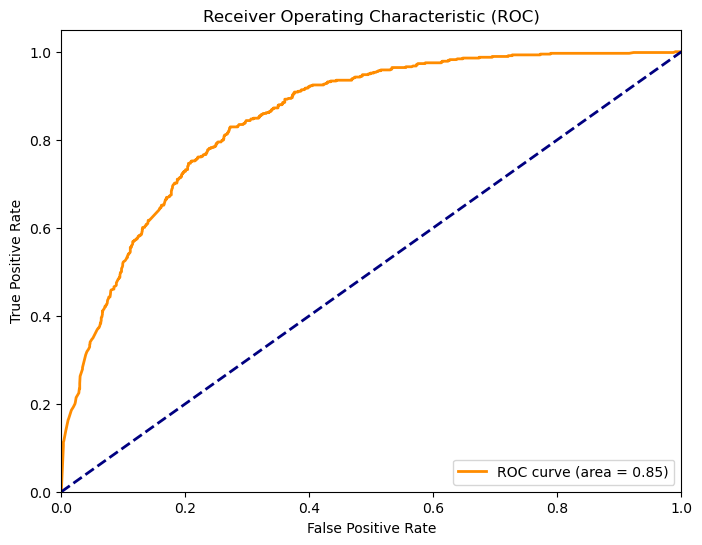

In [181]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
X_test = X_test.astype(int)
# Dự đoán xác suất và tính toán ROC
y_scores = rf_model.predict_proba(X_test)[:, 1]  # Lấy xác suất của lớp positive
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
